In [2]:
from skimage import io, data
import os
import numpy as np
from matplotlib.pyplot import figure, subplot
from scipy import ndimage, signal
from skimage import io, img_as_float, data
from matplotlib import pyplot as plt
from skimage.feature import canny
from skimage.filters import median, gaussian, sobel
from skimage.morphology import dilation, erosion
from skimage.filters.edges import convolve
from ipykernel.pylab.backend_inline import flush_figures
from ipywidgets import interact, interactive, fixed
from numpy import array

In [3]:
class Load:
    def __init__(self):
        return

    @staticmethod
    def img(file):
        img = os.path.join('C:/Users/czart/Desktop/Studia/kck/lab4/res/', file)
        return img

In [48]:
class Filter:
    def __init__(self):
        return

    @staticmethod
    def gray(img):
        gray_img = io.imread(img, as_gray=True)
        #io.imshow(gray_img)
        #plt.show()
        return gray_img

    @staticmethod
    def median(img):
        median_img = io.imread(img)
        med = median(median_img)
        io.imshow(med)
        plt.show()

    @staticmethod
    def gaussian(img):
        gaus_img = io.imread(img)
        gaus = gaussian(gaus_img, sigma=1)
        io.imshow(gaus)
        plt.show()

    @staticmethod
    def sobel(img):
        sobel_img = io.imread(img)
        sob = sobel(sobel_img)
        io.imshow(sob)
        plt.show()

    @staticmethod
    def canny(): #przerobic, bo z neta
        im = np.zeros((128, 128))
        im[32:-32, 32:-32] = 1

        im = ndimage.rotate(im, 15, mode='constant')
        im = ndimage.gaussian_filter(im, 4)
        im += 0.2 * np.random.random(im.shape)

        # Compute the Canny filter for two values of sigma
        edges1 = canny(im)
        edges2 = canny(im, sigma=3)

        # display results
        plt.figure(figsize=(8, 3))

        plt.subplot(131)
        plt.imshow(im, cmap=plt.cm.jet)
        plt.axis('off')
        plt.title('noisy image', fontsize=20)

        plt.subplot(132)
        plt.imshow(edges1, cmap=plt.cm.gray)
        plt.axis('off')
        plt.title('Canny filter, $\sigma=1$', fontsize=20)

        plt.subplot(133)
        plt.imshow(edges2, cmap=plt.cm.gray)
        plt.axis('off')
        plt.title('Canny filter, $\sigma=3$', fontsize=20)

        plt.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9,
                            bottom=0.02, left=0.02, right=0.98)

        plt.show()
    
    @staticmethod
    def dilation(img):
        dilation_img = io.imread(img)
        dil = dilation(dilation_img)
        io.imshow(dil)
        plt.show()
       
    @staticmethod
    def erosion(img):
        erosion_img = io.imread(img)
        ero = erosion(erosion_img)
        io.imshow(ero)
        plt.show()

    @staticmethod
    def contur3(img_in):
        
        #img = img_as_float(io.imread(img_in)) 
        img = img_as_float(img_in)
        
        figure(figsize=(12,6))

        Kh = array([[ 2, 4, 2],
                    [ 0, 0, 0],
                    [-2,-4,-2]]) 
        Kh = Kh / 8

        Kv = array([[ 2, 0,-2],
                    [ 4, 0,-4],
                    [ 2, 0,-2]])
        Kv = Kv / 8

        hor = np.abs(convolve(img, Kh))
        ver = np.abs(convolve(img, Kv))

        res = np.sqrt(hor**2 + ver**2)
        #res = np.sqrt(hor*0.5 + ver*0.5)
        #res = (hor+ver)/2

        io.imshow(res)

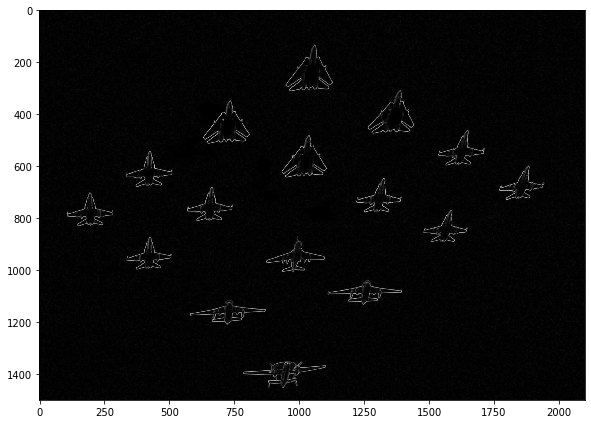

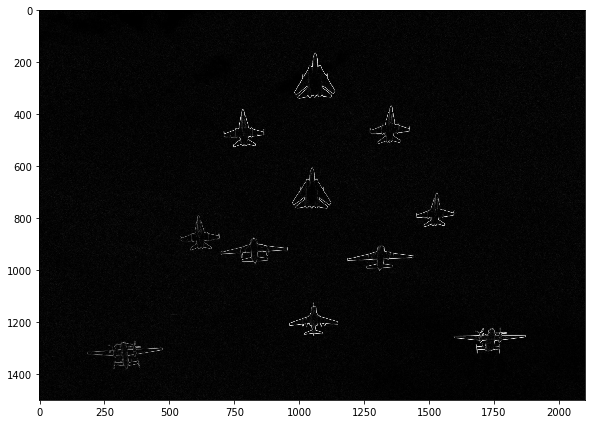

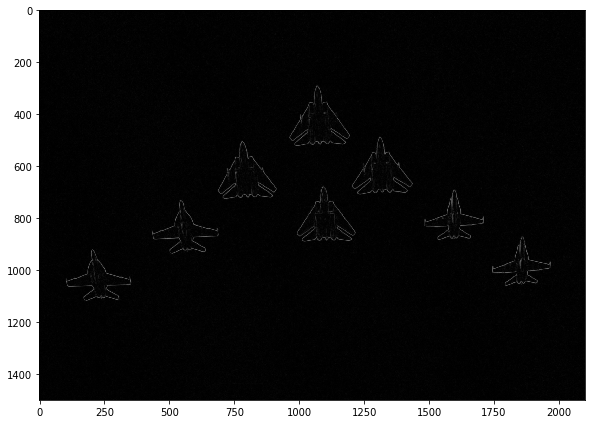

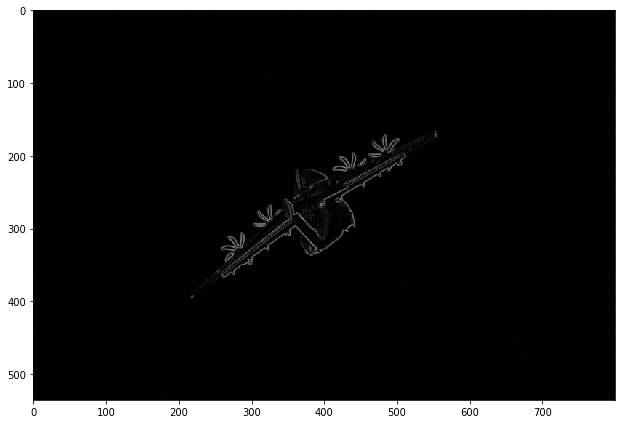

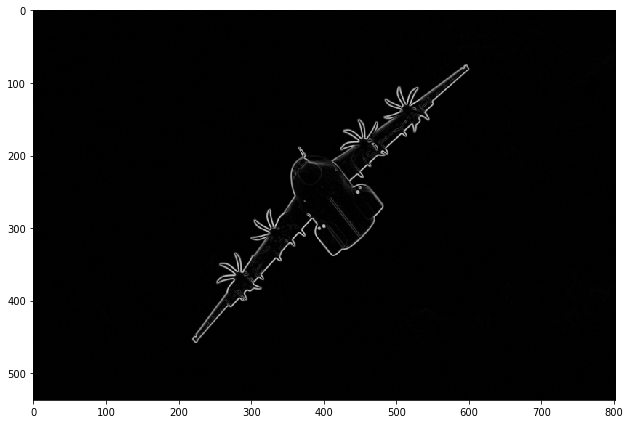

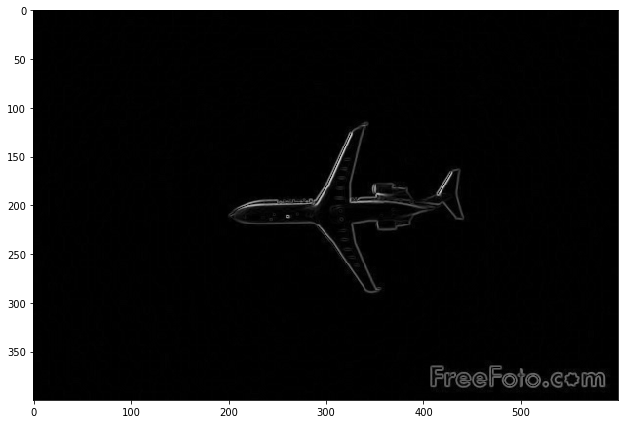

In [49]:
# Jak wczytujemy obrazek od razu do contur3, jego tablica jest 3d, a jak obrobimy go wczesniej jakąś funkcją do filtrowania
# typu gray, to jego tablica jest 2d
def main():
    img1 = Load.img('samolot00.jpg')
    img2 = Load.img('samolot03.jpg')
    img3 = Load.img('samolot05.jpg')
    img4 = Load.img('samolot06.jpg')
    img5 = Load.img('samolot11.jpg')
    img6 = Load.img('samolot18.jpg')

    g_img1 = Filter.gray(img1)
    g_img2 = Filter.gray(img2)
    g_img3 = Filter.gray(img3)
    g_img4 = Filter.gray(img4)
    g_img5 = Filter.gray(img5)
    g_img6 = Filter.gray(img6)
    
    Filter.contur3(g_img1)
    Filter.contur3(g_img2)
    Filter.contur3(g_img3)
    Filter.contur3(g_img4)
    Filter.contur3(g_img5)
    Filter.contur3(g_img6)


if __name__ == '__main__':
    main()